In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("../data/new_data.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [24]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [25]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

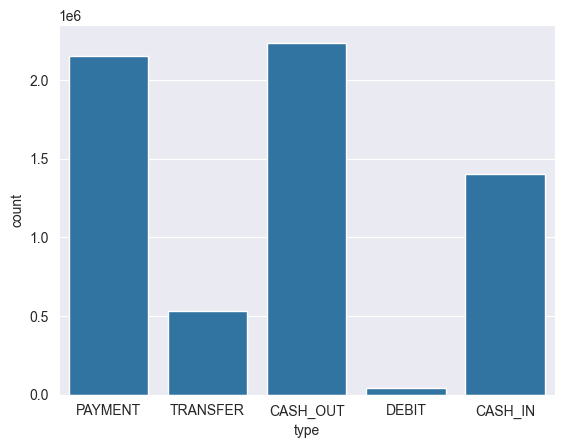

In [26]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

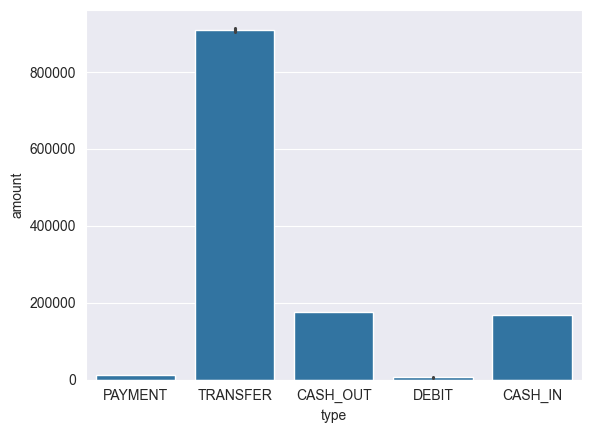

In [27]:
sns.barplot(x='type', y='amount', data=data)

In [28]:
counts = data['isFraud'].value_counts()
counts

isFraud
0    6354407
1       8213
Name: count, dtype: int64

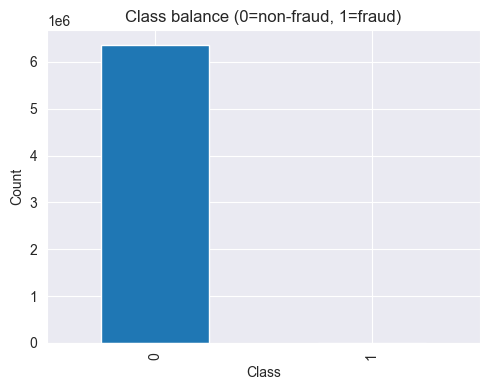

In [29]:
# Plot class balance
plt.figure(figsize=(5,4))
counts.plot(kind='bar')
plt.title('Class balance (0=non-fraud, 1=fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='step', ylabel='Count'>

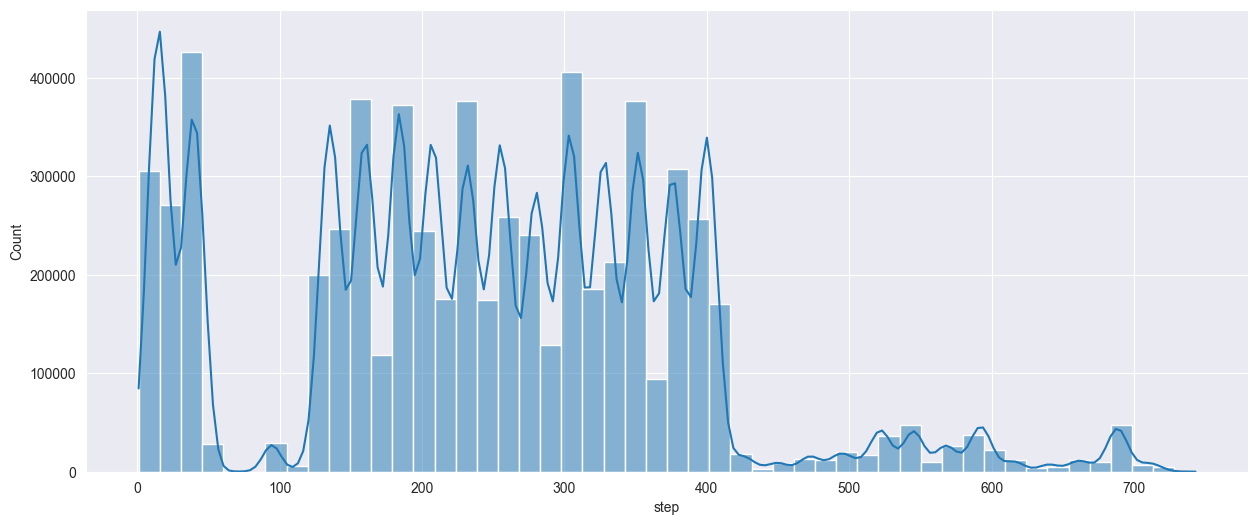

In [30]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)

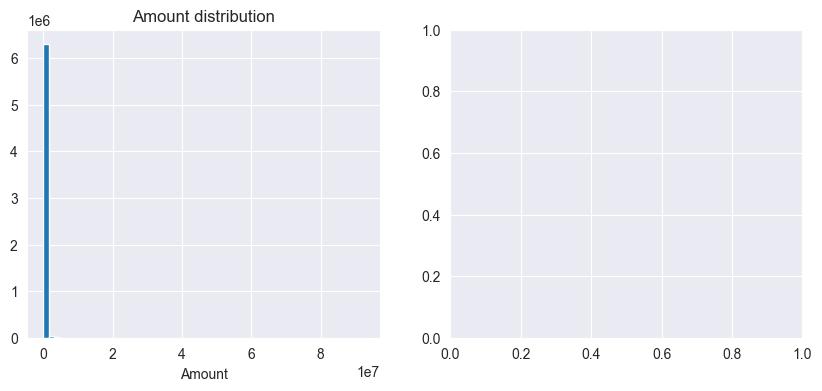

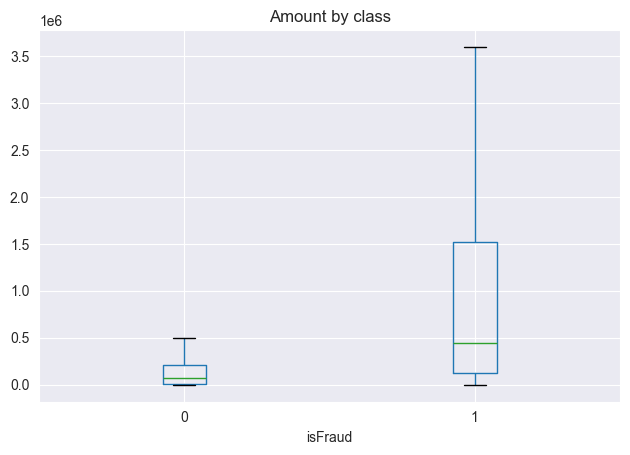

In [31]:
# Plot histogram of amount and boxplot by class
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data['amount'].dropna(), bins=60)
plt.title('Amount distribution')
plt.xlabel('Amount')

plt.subplot(1,2,2)
data.boxplot(column='amount', by='isFraud', showfliers=False)
plt.title('Amount by class')
plt.suptitle('')
plt.tight_layout()
plt.show()

<Axes: >

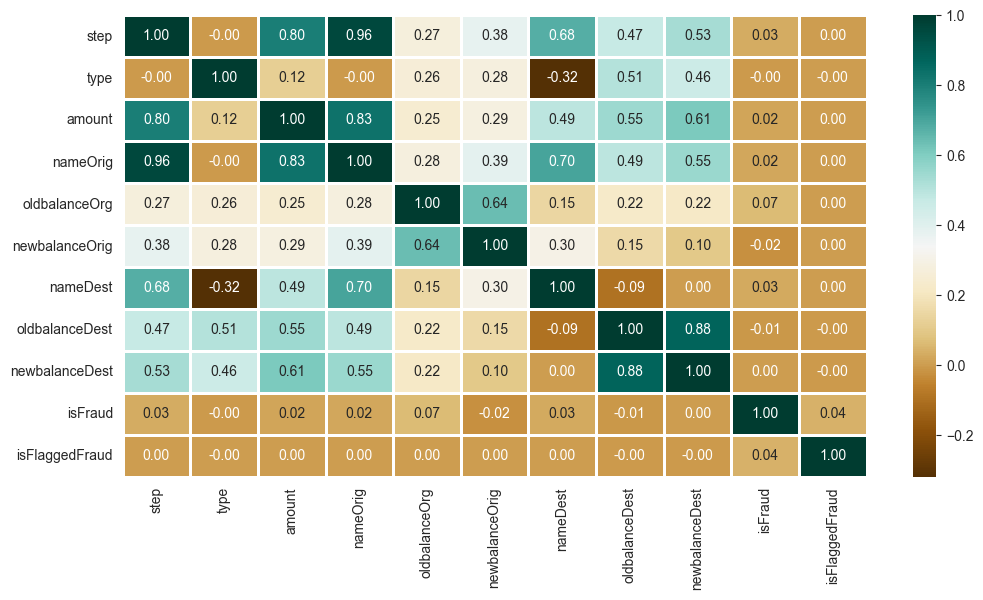

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [33]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [34]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [35]:
X.shape, y.shape

((6362620, 11), (6362620,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Baseline Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Tree-based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [39]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
}

In [40]:
from sklearn.metrics import (
    roc_auc_score, classification_report,
    confusion_matrix, f1_score
)

results = []

for name, model in models.items():
    print(f'\n--- {name} ---')

    model.fit(X_train, y_train)
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]
    y_test_label = model.predict(X_test)

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_label, pos_label=1)

    print(f'Train ROC-AUC: {train_auc:.3f}')
    print(f'Test ROC-AUC: {test_auc:.3f}')
    print(f'F1-Score (Fraud class): {f1:.3f}')
    print(classification_report(y_test, y_test_label, digits=3))

    results.append({
        'Model': name,
        'Train ROC-AUC': train_auc,
        'Test ROC-AUC': test_auc,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_test_label),
        'Report': classification_report(y_test, y_test_label, output_dict=True)
    })


--- Logistic Regression ---
Train ROC-AUC: 0.989
Test ROC-AUC: 0.988
F1-Score (Fraud class): 0.636
              precision    recall  f1-score   support

           0      0.999     1.000     1.000   1906351
           1      0.903     0.491     0.636      2435

    accuracy                          0.999   1908786
   macro avg      0.951     0.746     0.818   1908786
weighted avg      0.999     0.999     0.999   1908786


--- Decision Tree ---
Train ROC-AUC: 1.000
Test ROC-AUC: 0.938
F1-Score (Fraud class): 0.883
              precision    recall  f1-score   support

           0      1.000     1.000     1.000   1906351
           1      0.890     0.876     0.883      2435

    accuracy                          1.000   1908786
   macro avg      0.945     0.938     0.941   1908786
weighted avg      1.000     1.000     1.000   1908786


--- Random Forest ---
Train ROC-AUC: 1.000
Test ROC-AUC: 0.962
F1-Score (Fraud class): 0.867
              precision    recall  f1-score   support

   

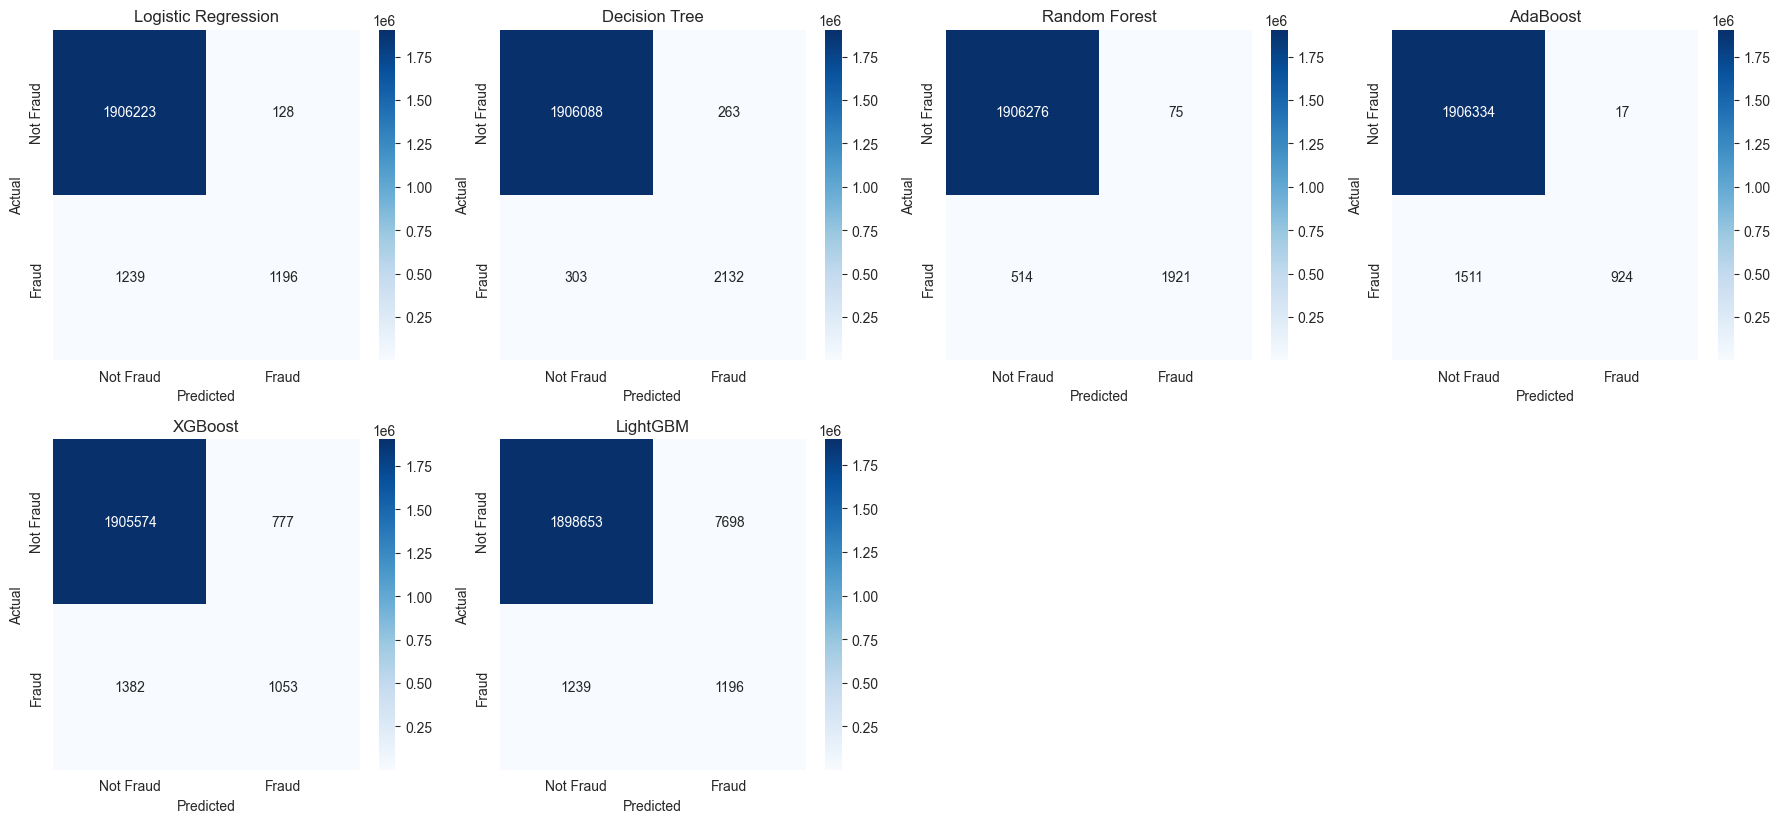

In [41]:
plt.figure(figsize=(18,12))
for i, res in enumerate(results):
    plt.subplot(3,4,i+1)
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(res['Model'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

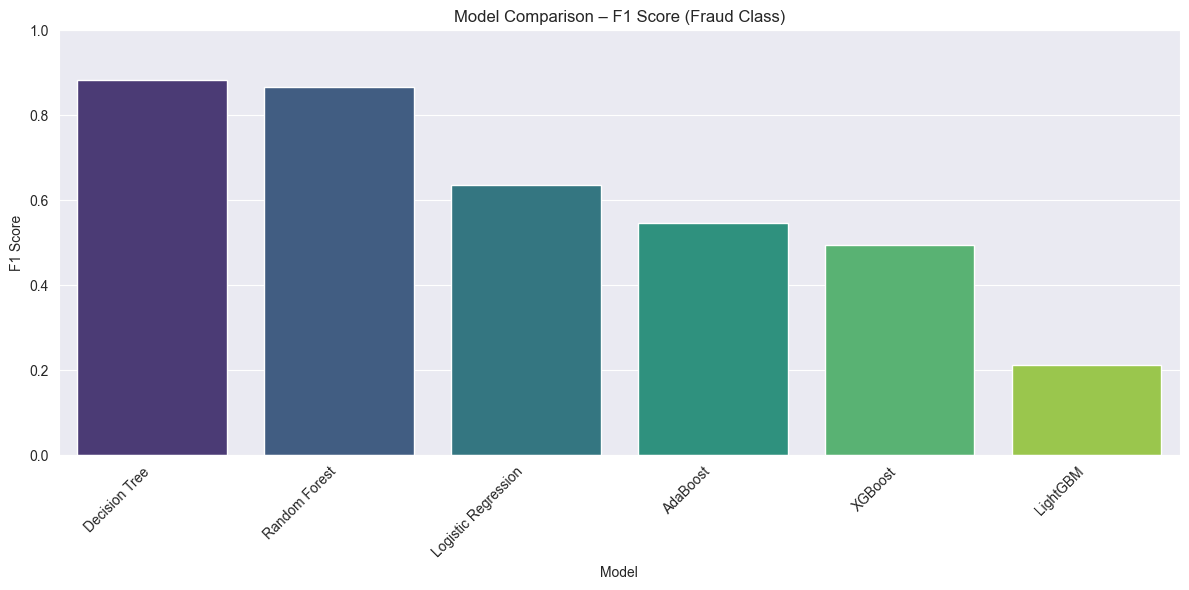

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to a DataFrame
f1_df = pd.DataFrame(results)[['Model', 'F1-Score']].sort_values('F1-Score', ascending=False)

# Plot vertical bars
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='F1-Score', hue='Model', data=f1_df, palette='viridis', legend=False)
plt.title('Model Comparison – F1 Score (Fraud Class)')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Create DataFrame of results
results_df = pd.DataFrame(results)

# Sort models by F1 score (descending)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

# Display ranking
print(results_df[['Model', 'F1-Score']])

# Select best-performing model
best_model_name = results_df.loc[0, 'Model']
best_model = models[best_model_name]

print(f'\nBest model based on F1-Score: {best_model_name}')

                 Model  F1-Score
0        Decision Tree  0.882816
1        Random Forest  0.867073
2  Logistic Regression  0.636339
3             AdaBoost  0.547393
4              XGBoost  0.493787
5             LightGBM  0.211140

Best model based on F1-Score: Decision Tree


C:\Users\KIIT\anaconda3\envs\FeatureEngineering\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


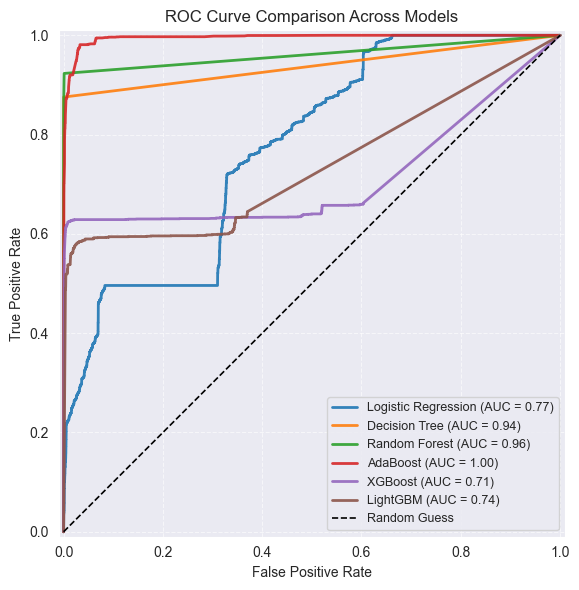

In [44]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot ROC curves for all models on the same figure
for name, model in models.items():
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        RocCurveDisplay.from_estimator(
            model, X_test_scaled, y_test, name=name,
            ax=plt.gca(),
            curve_kwargs={'alpha': 0.9, 'lw': 2}
        )
    else:
        RocCurveDisplay.from_estimator(
            model, X_test, y_test, name=name,
            ax=plt.gca(),
            curve_kwargs={'alpha': 0.9, 'lw': 2}
        )

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1.2, label='Random Guess')

# Formatting
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Best model based on F1-Score: Decision Tree


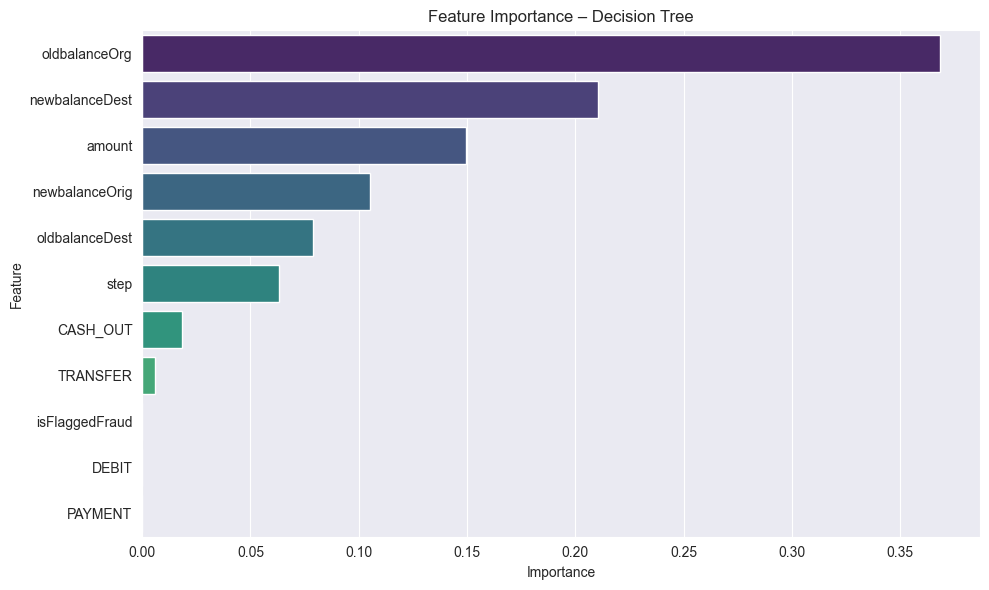

In [45]:
# Permutation importance for best model (by F1)
import numpy as np

best_model_name = f1_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f'Best model based on F1-Score: {best_model_name}')

# --- Feature Importance (model-based) ---
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features, hue=features, palette='viridis', legend=False)
    plt.title(f'Feature Importance – {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f'{best_model_name} has no built-in feature importance.')

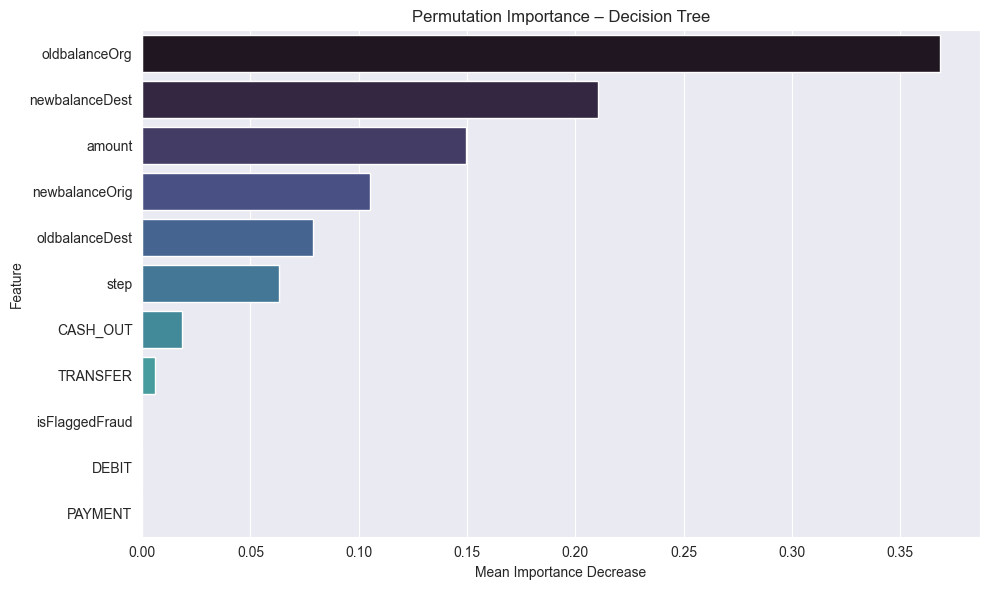

In [46]:
from sklearn.inspection import permutation_importance

# Handle scaled input for models that require scaling
if best_model_name in ['SVM', 'KNN', 'Logistic Regression']:
    X_input = X_test_scaled
else:
    X_input = X_test

result = permutation_importance(
    best_model, X_input, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features, hue=features, palette='mako', legend=False)
plt.title(f'Permutation Importance – {best_model_name}')
plt.xlabel('Mean Importance Decrease')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()